## Predicting Covid 19 Mortality Based on Diet

Given *data about various countries and their daily intakes of different food groups*, let's try to predict whether a given country will have a **high or low COVID-19 mortality rate**.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-06-15 11:22:59.395781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('archive/Food_Supply_Quantity_kg_Data.csv')
data

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

### Preprocessing

In [4]:
data = data.drop('Unit (all except Population)', axis=1)

##### Missing values

In [5]:
data.isna().sum()

Country                     0
Alcoholic Beverages         0
Animal fats                 0
Animal Products             0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Sugar Crops                 0
Treenuts                    0
Vegetable Oils              0
Vegetables                  0
Vegetal Products            0
Obesity                     3
Undernourished              7
Confirmed                   6
Deaths                      6
Recovered                   6
Active                      8
Population                  0
dtype: int64

In [6]:
for column in data.columns:
    if data.dtypes[column] != 'object' and data.isna().sum()[column] > 0:
        data[column] = data[column].fillna(data[column].mean())

In [7]:
data.isna().sum()

Country                     0
Alcoholic Beverages         0
Animal fats                 0
Animal Products             0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Sugar Crops                 0
Treenuts                    0
Vegetable Oils              0
Vegetables                  0
Vegetal Products            0
Obesity                     0
Undernourished              7
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

In [8]:
# Dealing with the 'Undernourished' column
data['Undernourished'].value_counts()

Undernourished
<2.5    44
16.5     3
7.1      3
2.7      3
6.2      3
        ..
15.2     1
10.2     1
10.5     1
4.2      1
51.3     1
Name: count, Length: 98, dtype: int64

In [9]:
undernourished_numeric = data.loc[data['Undernourished'] != '<2.5', 'Undernourished'].astype(float)
undernourished_numeric

0      29.8
1       6.2
2       3.9
3      25.0
4       NaN
       ... 
165    21.2
166     9.3
167    38.9
168    46.7
169    51.3
Name: Undernourished, Length: 126, dtype: float64

In [10]:
undernourished_numeric = undernourished_numeric.fillna(undernourished_numeric.mean())

In [11]:
undernourished_numeric = pd.qcut(undernourished_numeric, q=3, labels=[1, 2, 3])
undernourished_numeric

0      3
1      1
2      1
3      3
4      2
      ..
165    3
166    2
167    3
168    3
169    3
Name: Undernourished, Length: 126, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [16]:
data['Undernourished'] = data['Undernourished'].apply(lambda x: 0 if x == '<2.5' else x)

In [18]:
data.loc[undernourished_numeric.index, 'Undernourished'] = undernourished_numeric

In [20]:
data['Undernourished'].value_counts()

Undernourished
0    44
3    42
1    42
2    42
Name: count, dtype: int64

#### Feature and Target Selection

In [21]:
data

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,3,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,1,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,1,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,3,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,19.1,2,0.293878,0.007143,0.190816,0.095918,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,3,0.452585,0.004287,0.424399,0.023899,28645000.0
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,2,0.002063,0.000036,0.001526,0.000501,96209000.0
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,3,0.007131,0.002062,0.004788,0.000282,29826000.0
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,3,0.334133,0.004564,0.290524,0.039045,18384000.0


In [22]:
data = data.drop('Country', axis=1)

data = data.drop(['Confirmed', 'Recovered', 'Active'], axis=1)

In [23]:
data

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Deaths,Population
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,3,0.006186,38928000.0
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,1,0.050951,2838000.0
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,1,0.006558,44357000.0
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,3,0.001461,32522000.0
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,19.1,2,0.007143,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,3,0.004287,28645000.0
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,2,0.000036,96209000.0
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,3,0.002062,29826000.0
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,3,0.004564,18384000.0


In [25]:
pd.qcut(data['Deaths'], q=2, labels=[0, 1]).value_counts()

Deaths
0    85
1    85
Name: count, dtype: int64

In [26]:
data['Deaths'] = pd.qcut(data['Deaths'], q=2, labels=[0,1])

#### Splitting/Scaling

In [27]:
data

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Deaths,Population
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,3,0,38928000.0
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,1,1,2838000.0
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,1,0,44357000.0
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,3,0,32522000.0
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,19.1,2,0,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,3,0,28645000.0
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,2,0,96209000.0
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,3,0,29826000.0
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,3,0,18384000.0


In [28]:
y = data['Deaths']
X = data.drop('Deaths', axis=1)

In [29]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### Training

In [31]:
X.shape

(170, 26)

In [39]:
inputs = tf.keras.Input(shape=(26, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [40]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 17

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/17
2/2 [==============================] - 1s 340ms/step - loss: 0.6968 - accuracy: 0.5370 - auc: 0.5415 - val_loss: 0.7492 - val_accuracy: 0.5000 - val_auc: 0.5179
Epoch 2/17
2/2 [==============================] - 0s 76ms/step - loss: 0.6483 - accuracy: 0.6204 - auc: 0.6754 - val_loss: 0.7137 - val_accuracy: 0.6071 - val_auc: 0.5974
Epoch 3/17
2/2 [==============================] - 0s 78ms/step - loss: 0.6017 - accuracy: 0.7037 - auc: 0.7743 - val_loss: 0.6846 - val_accuracy: 0.6429 - val_auc: 0.6436
Epoch 4/17
2/2 [==============================] - 0s 80ms/step - loss: 0.5680 - accuracy: 0.7130 - auc: 0.8278 - val_loss: 0.6593 - val_accuracy: 0.6429 - val_auc: 0.6769
Epoch 5/17
2/2 [==============================] - 0s 77ms/step - loss: 0.5373 - accuracy: 0.7407 - auc: 0.8560 - val_loss: 0.6375 - val_accuracy: 0.6429 - val_auc: 0.7179
Epoch 6/17
2/2 [==============================] - 0s 94ms/step - loss: 0.5140 - accuracy: 0.7500 - auc: 0.8651 - val_loss: 0.6175 - val_accuracy

### Results

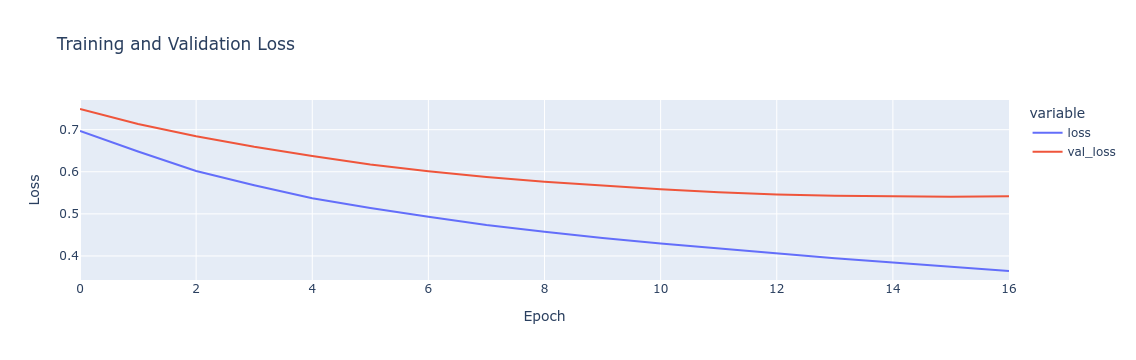

In [41]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels = {'index': 'Epoch', 'value': 'Loss'},
    title = "Training and Validation Loss"
)

fig.show()

In [43]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.4407 - accuracy: 0.7647 - auc: 0.8837


[0.440687894821167, 0.7647058963775635, 0.8836805820465088]